In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper

In [2]:
# hierarchical
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
# Import the Movies dataset
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Import the ratings dataset
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
data = pd.merge(ratings, movies, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [12]:
pd.merge(ratings, movies[['movieId', 'title']], on='movieId')

,userId,movieId,rating,timestamp,title
0,1,31,2.5,1260759144,Dangerous Minds (1995)
1,7,31,3.0,851868750,Dangerous Minds (1995)
2,31,31,4.0,1273541953,Dangerous Minds (1995)
3,32,31,4.0,834828440,Dangerous Minds (1995)
4,36,31,3.0,847057202,Dangerous Minds (1995)
...,...,...,...,...,...
99999,664,64997,2.5,1343761859,War of the Worlds (2005)
100000,664,72380,3.5,1344435977,"Box, The (2009)"
100001,665,129,3.0,995232528,Pie in the Sky (1996)
100002,665,4736,1.0,1010197684,Summer Catch (2001)


In [18]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [8]:
n_movies = 1000
n_users = 671
most_rated_movies_users_selection = user_movie_ratings

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()
most_rated_movies_users_selection.replace(np.nan, 0, inplace=True)

dataset dimensions:  (671, 9064)


In [11]:
most_rated_movies_users_selection['labels'] = 0
print(most_rated_movies_users_selection)

title   "Great Performances" Cats (1998)  $9.99 (2008)  \
userId                                                   
1                                    0.0           0.0   
2                                    0.0           0.0   
3                                    0.0           0.0   
4                                    0.0           0.0   
5                                    0.0           0.0   
...                                  ...           ...   
667                                  0.0           0.0   
668                                  0.0           0.0   
669                                  0.0           0.0   
670                                  0.0           0.0   
671                                  0.0           0.0   

title   'Hellboy': The Seeds of Creation (2004)  \
userId                                            
1                                           0.0   
2                                           0.0   
3                                        

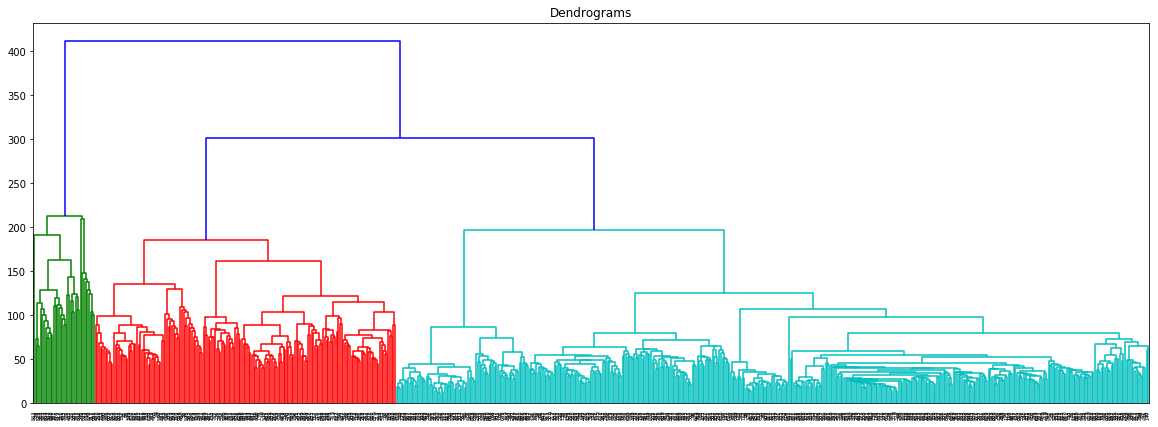

In [10]:
plt.figure(figsize=(20, 7))
plt.title("Dendrograms")
link = linkage(most_rated_movies_users_selection, method='ward')
dend = dendrogram(link)

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
cluster = AgglomerativeClustering(n_clusters=40, affinity='euclidean', linkage='ward')  
result = cluster.fit_predict(most_rated_movies_users_selection)
result

array([ 9,  7,  9, 29, 33,  9,  9, 37, 10,  5, 10, 35, 16,  7, 10, 36, 20,
       26, 28, 15,  3, 13,  2, 34, 15,  8, 34,  8, 20, 20,  5,  5,  2, 17,
       39,  1, 27,  3, 31,  1,  1, 16, 23, 19, 19, 14, 27,  2, 39, 11, 27,
       31, 19, 39, 17, 39,  2,  2,  1, 39,  5,  1,  3, 27, 17,  1,  5,  3,
       19, 31,  2,  0, 26,  0,  0,  3, 17, 17,  5, 30,  3, 23, 32, 14,  1,
       17,  5, 30, 27, 39, 23,  0,  2,  1,  3, 11,  3, 39,  0, 32, 14,  1,
        0, 14, 30,  3,  6, 11, 14, 14, 23, 13, 14, 11, 14,  1, 13,  6, 23,
       22, 14,  6,  0,  0, 17, 32, 12, 11,  0,  4, 24, 14,  0, 27, 12, 22,
       14,  6,  6, 12, 22, 14, 30,  1, 12,  0, 22,  6, 13, 22, 18,  6,  6,
       14,  6, 13, 12,  0,  6, 13,  6,  6, 14, 18,  6,  6,  0, 18, 11, 18,
       12, 12,  6, 18, 22,  6, 12, 24, 18, 30, 12,  6,  6, 22, 12, 12, 22,
        6, 18, 24, 14, 13, 14, 24,  4,  6, 30, 14, 14, 30, 18, 22, 18, 32,
       14,  0, 13, 18, 18, 13, 18, 13, 22, 18, 12, 18,  4,  4, 22, 22, 30,
       14,  6, 18,  4, 12

In [25]:
ans = {}

for i in range(len(result)):
    ans[most_rated_movies_users_selection.columns[i]] = result[i]
ans

{'Forrest Gump (1994)': 9,
 'Pulp Fiction (1994)': 7,
 'Shawshank Redemption, The (1994)': 9,
 'Silence of the Lambs, The (1991)': 29,
 'Star Wars: Episode IV - A New Hope (1977)': 33,
 'Jurassic Park (1993)': 9,
 'Matrix, The (1999)': 9,
 'Toy Story (1995)': 37,
 "Schindler's List (1993)": 10,
 'Terminator 2: Judgment Day (1991)': 5,
 'Star Wars: Episode V - The Empire Strikes Back (1980)': 10,
 'Braveheart (1995)': 35,
 'Back to the Future (1985)': 16,
 'Fargo (1996)': 7,
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)': 10,
 'American Beauty (1999)': 36,
 'Independence Day (a.k.a. ID4) (1996)': 20,
 'Star Wars: Episode VI - Return of the Jedi (1983)': 26,
 'Aladdin (1992)': 28,
 'Fugitive, The (1993)': 15,
 'Dances with Wolves (1990)': 3,
 'Fight Club (1999)': 13,
 'Usual Suspects, The (1995)': 2,
 'Seven (a.k.a. Se7en) (1995)': 34,
 'Lion King, The (1994)': 15,
 'Godfather, The (1972)': 8,
 'Lord of the Rings: The Fellowship of the Ring, The (2001)'

In [33]:
my_movie_group = 12
match_arr = []
for title, group in ans.items():
    if my_movie_group == group:
        match_arr += [title]
print(match_arr)

['Natural Born Killers (1994)', "Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)", 'Full Metal Jacket (1987)', 'Kill Bill: Vol. 2 (2004)', 'As Good as It Gets (1997)', 'Donnie Darko (2001)', 'Ace Ventura: When Nature Calls (1995)', 'Lethal Weapon (1987)', 'Graduate, The (1967)', 'Meet the Parents (2000)', 'High Fidelity (2000)', 'Run Lola Run (Lola rennt) (1998)', 'Untouchables, The (1987)', 'Little Miss Sunshine (2006)', 'WALL·E (2008)', 'Christmas Story, A (1983)', 'Maverick (1994)', 'Enemy of the State (1998)', 'Die Hard 2 (1990)', 'Notting Hill (1999)', 'Crocodile Dundee (1986)', 'Unforgiven (1992)']


In [26]:
movies_selection = most_rated_movies_users_selection.T
movies_selection

,14,72,467,546,563,211,579,623,451,460,...,288,444,257,578,443,226,376,662,565,300
title,,,,,,,,,,,,,,,,,,,,,
Forrest Gump (1994),1.0,5.0,3.0,2.0,3.0,4.0,3.5,3.0,4.0,4.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
Pulp Fiction (1994),5.0,5.0,3.5,5.0,5.0,4.0,4.5,5.0,5.0,4.5,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Shawshank Redemption, The (1994)",2.0,5.0,3.5,5.0,0.0,4.5,4.0,0.0,5.0,5.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
"Silence of the Lambs, The (1991)",5.0,4.5,3.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,...,0.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
Star Wars: Episode IV - A New Hope (1977),5.0,4.5,3.5,0.0,2.0,4.0,4.0,5.0,4.0,4.5,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ocean's Thirteen (2007),3.5,2.0,2.5,3.0,0.0,2.5,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Seabiscuit (2003),0.0,2.5,2.5,0.0,0.0,3.5,3.5,0.0,3.5,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Easy Rider (1969),2.5,0.0,0.0,5.0,0.0,3.0,3.5,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
movies_selection['labels'] = 0

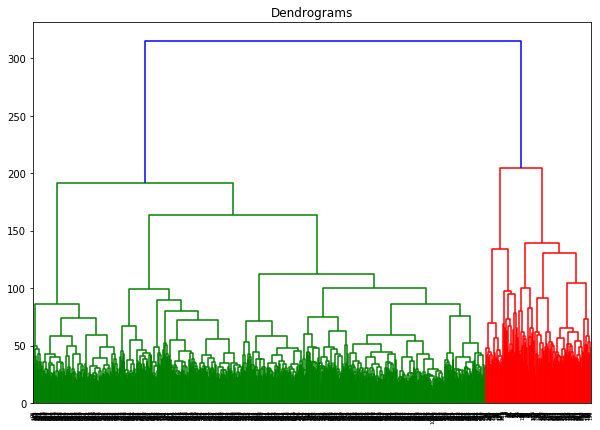

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
link_M = linkage(movies_selection, method='ward')
dend2 = dendrogram(link_M)

In [29]:
cluster2 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
result2 = cluster.fit_predict(movies_selection)

In [30]:
ans2 = {re:[] for re in result2}
for i in range(len(result)):
    ans2[movies_selection.columns[i]] = result[i]
ans2

{0: 4,
 6: 12,
 36: 4,
 20: 12,
 7: 6,
 38: 38,
 31: 38,
 1: 18,
 35: 18,
 27: 24,
 33: 0,
 22: 26,
 11: 4,
 26: 4,
 39: 25,
 37: 25,
 25: 14,
 3: 11,
 4: 30,
 21: 39,
 30: 25,
 13: 4,
 5: 4,
 2: 25,
 16: 3,
 17: 21,
 32: 4,
 34: 4,
 9: 4,
 29: 10,
 23: 38,
 24: 21,
 19: 12,
 28: 4,
 8: 4,
 18: 31,
 10: 25,
 14: 9,
 12: 4,
 15: 4,
 72: 7,
 467: 9,
 546: 29,
 563: 33,
 211: 9,
 579: 9,
 623: 37,
 451: 10,
 460: 5,
 508: 10,
 653: 35,
 310: 16,
 379: 7,
 387: 36,
 471: 20,
 293: 28,
 118: 15,
 456: 3,
 212: 13,
 606: 2,
 305: 34,
 231: 15,
 104: 8,
 517: 34,
 595: 8,
 357: 20,
 101: 20,
 462: 5,
 129: 5,
 267: 2,
 663: 17,
 352: 39,
 164: 1,
 194: 27,
 55: 3,
 664: 1,
 149: 1,
 241: 16,
 284: 23,
 383: 19,
 479: 19,
 261: 14,
 504: 27,
 133: 2,
 560: 39,
 574: 11,
 528: 27,
 513: 31,
 573: 19,
 354: 39,
 474: 17,
 76: 39,
 561: 2,
 429: 2,
 87: 1,
 242: 39,
 110: 5,
 291: 1,
 480: 3,
 586: 27,
 614: 17,
 312: 1,
 597: 5,
 422: 3,
 77: 19,
 536: 31,
 576: 2,
 302: 0,
 430: 26,
 604: 0,
 3

In [35]:
my_group = 4
arr = []
for person, group in ans2.items():
    if my_group == group:
        arr += [person]
print(arr)

[0, 36, 11, 26, 13, 5, 32, 34, 9, 28, 8, 12, 15, 411, 132, 188, 527, 625, 385, 42, 262, 440, 380, 163, 421, 651, 290, 655, 593, 620, 168, 492, 326, 616, 611, 289, 364, 192, 197, 627, 48, 320, 657, 461, 78, 418, 165, 97, 523, 541, 59, 490, 170, 114, 397, 195, 553, 217, 475, 273, 155, 466, 359, 130, 652, 600, 201, 473, 139, 152, 57, 469, 205, 206, 185, 178, 347, 189, 413, 572, 454, 141, 228, 423, 392, 259, 643, 450, 575, 116, 409, 669, 202, 570, 590, 209, 52, 180, 263, 146, 660, 464, 140, 230, 577, 51, 498, 350, 53, 169, 371, 358, 45, 314, 207, 514, 339, 668, 636, 105, 64, 644, 540, 331, 115, 203, 410, 322, 481, 108, 629, 641, 599, 564, 634, 335, 365, 245, 179, 304, 363, 396, 394, 434, 325, 610, 258, 633, 511, 505, 309, 324, 321, 221, 220, 617, 166, 173, 275, 271, 208, 318, 497, 538, 445, 525, 468, 488, 484, 630, 285, 50, 279, 556, 367, 348, 346, 403, 548, 637, 44, 330, 122, 650, 476, 491, 402, 75, 667, 128, 268, 336, 340, 603, 428, 391, 580, 642, 539, 334, 70, 295, 225, 503, 608, 157, 3